In [1]:
import numpy as np
from numpy import linalg as LA


import scipy
from scipy import linalg
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import Image

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])   # (n, s1)
y = np.array([[1],[0],[0],[1]])           # (n, 1)
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[1]
 [0]
 [0]
 [1]]


In [3]:
num = 100
sigma = 0.03

X00 = np.random.normal(0,sigma, size=(num,2))
y00 = np.ones((num,1))

X11 = np.random.normal(1,sigma, size=(num,2))
y11 = np.ones((num,1))


x01 = np.random.normal(0,sigma, size=(num,1))
y01 = np.random.normal(1,sigma, size=(num,1))
X01 = np.concatenate((x01, y01), axis=1)
y01 = np.zeros((num,1))

x10 = np.random.normal(1,sigma, size=(num,1))
y10 = np.random.normal(0,sigma, size=(num,1))
X10 = np.concatenate((x10, y10), axis=1)
y10 = np.zeros((num,1))



X = np.concatenate((X00, X01, X10, X11), axis=0)
y = np.concatenate((y00, y01, y10, y11), axis=0)

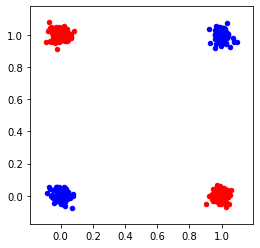

In [4]:
x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])
x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])


fig, ax = plt.subplots(figsize=(4,4))

plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)

ax.scatter(X[:,0], X[:,1], s=1)

for i in range(len(y)):
    if y[i] < 0.1:
        ax.scatter(X[i,0], X[i,1], s=20, c="red")
    else:
        ax.scatter(X[i,0], X[i,1], s=20, c="blue")

plt.show()

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

n =  400
s1 =  2


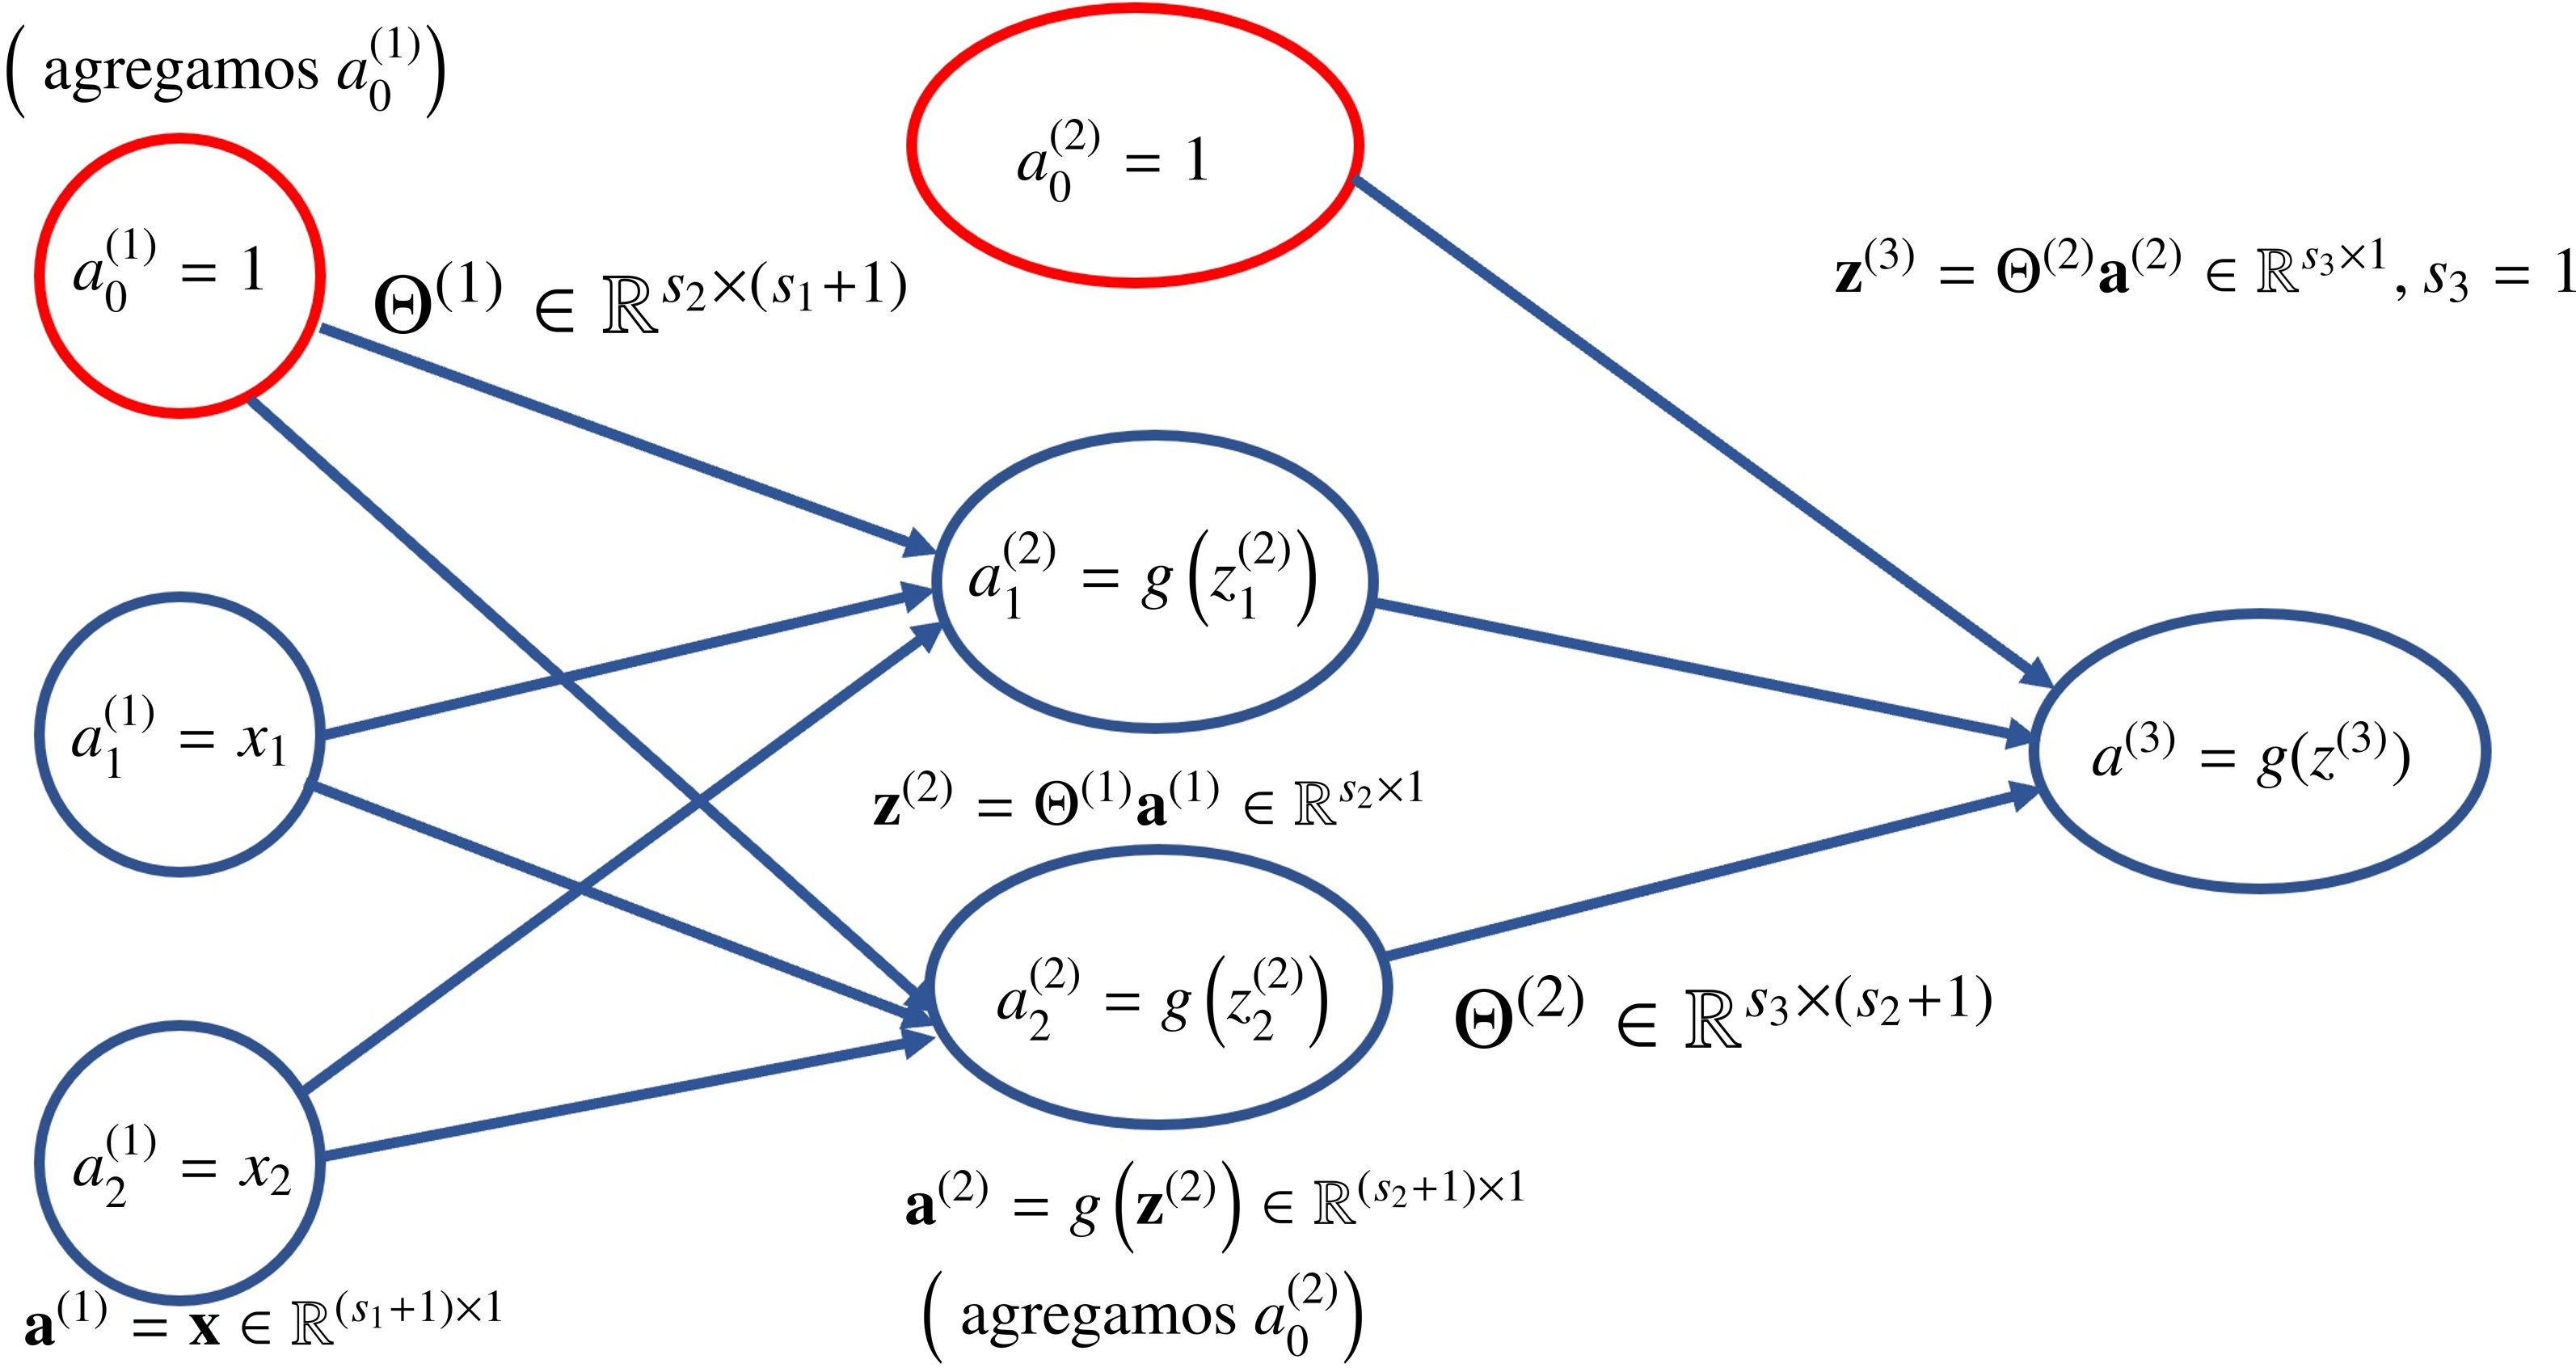

In [6]:
"""Arquitectura"""
n = X.shape[0]
s1 = X.shape[1]

s2 = 2
s3 = 1
print("n = ", n)
print("s1 = ", s1)

Image(filename='f01.png')

In [7]:
"""Forward Propagation"""
A1 = X.T                # (s1, n)
one_n = np.ones((1,n))  # (1, n)
A_1 = np.concatenate((one_n, A1), axis=0)  # (s1+1, n)
# print(A_1)
# print(A_1.shape)

def forward(Theta1, Theta2):       # Theta1: (s2, s1+1)=(2,3), Theta2: (s3, s2+1)=(1,3)
    
#    print("En forward: Theta1.shape = ", Theta1.shape)
#    print("En forward: Theta2.shape = ", Theta2.shape)
    
    Z2 = Theta1.dot(A_1)                       # (s2, n):  (2,3).dot(3,4) = (2,4) 
    A2 = sigmoid(Z2)                           # (s2, n): (2,4)
    A_2 = np.concatenate((one_n, A2), axis=0)  # (s2+1, n): (3,4)
    
    Z3 = Theta2.dot(A_2)                       # (s3, n) = (1, n):  (1,3).dot(3,4)=(1,4)
    A3 = sigmoid(Z3)                           # (s3, n) = (1, n): (1,4)
#    print("En forward: A3.shape = ", A3.shape)
    
    
    return A_2, A3    # A_2: (s2+1, n)=(3,4), A3: (1, n)=(1,4)

In [8]:
"""Cost Function"""

def J(A3):    # y: (n, 1), viene dado de afuera, A3: (1, n)
    j = -( (np.log(A3)).dot(y) + (np.log(1-A3)).dot(1-y) )/n 
#    print("En J: j.shape = ", j.shape)
    return j[0,0] 

In [9]:
"""Gradiente"""

def gradient(Theta1, Theta2, A_2, A3, lambd):           # Theta1: (s2, s1+1), Theta2: (1, s2+1)
                                                 # A_2: (s2+1, n), A3: (1, n)
    delta3 = A3 - y.T                            # (1, n)
#    print(delta3.shape)
    grad2 = delta3.dot(A_2.T)/n + lambd*Theta2   # (1, n).dot(n, s2+1) = (1, s2+1)
    
    delta2 = (((Theta2.T)*A_2)*(1-A_2))*delta3     # (s2+1, 1)*(s2+1, n)*(s2+1, n)*(1, n) = (s2+1, n) perola primera fila = 0
#    print("delta2.shape_antes = ", delta2.shape)
    delta2 = np.delete(delta2, 0, 0)             # delta2: (s2, n), le borramos la fila 0
#    print("delta2.shape_despues = ", delta2.shape)
    grad1 = delta2.dot(A_1.T)/n + lambd*Theta1   # (s2, n).dot(n, s1+1) = (s2, s1+1)
    
    return grad1, grad2

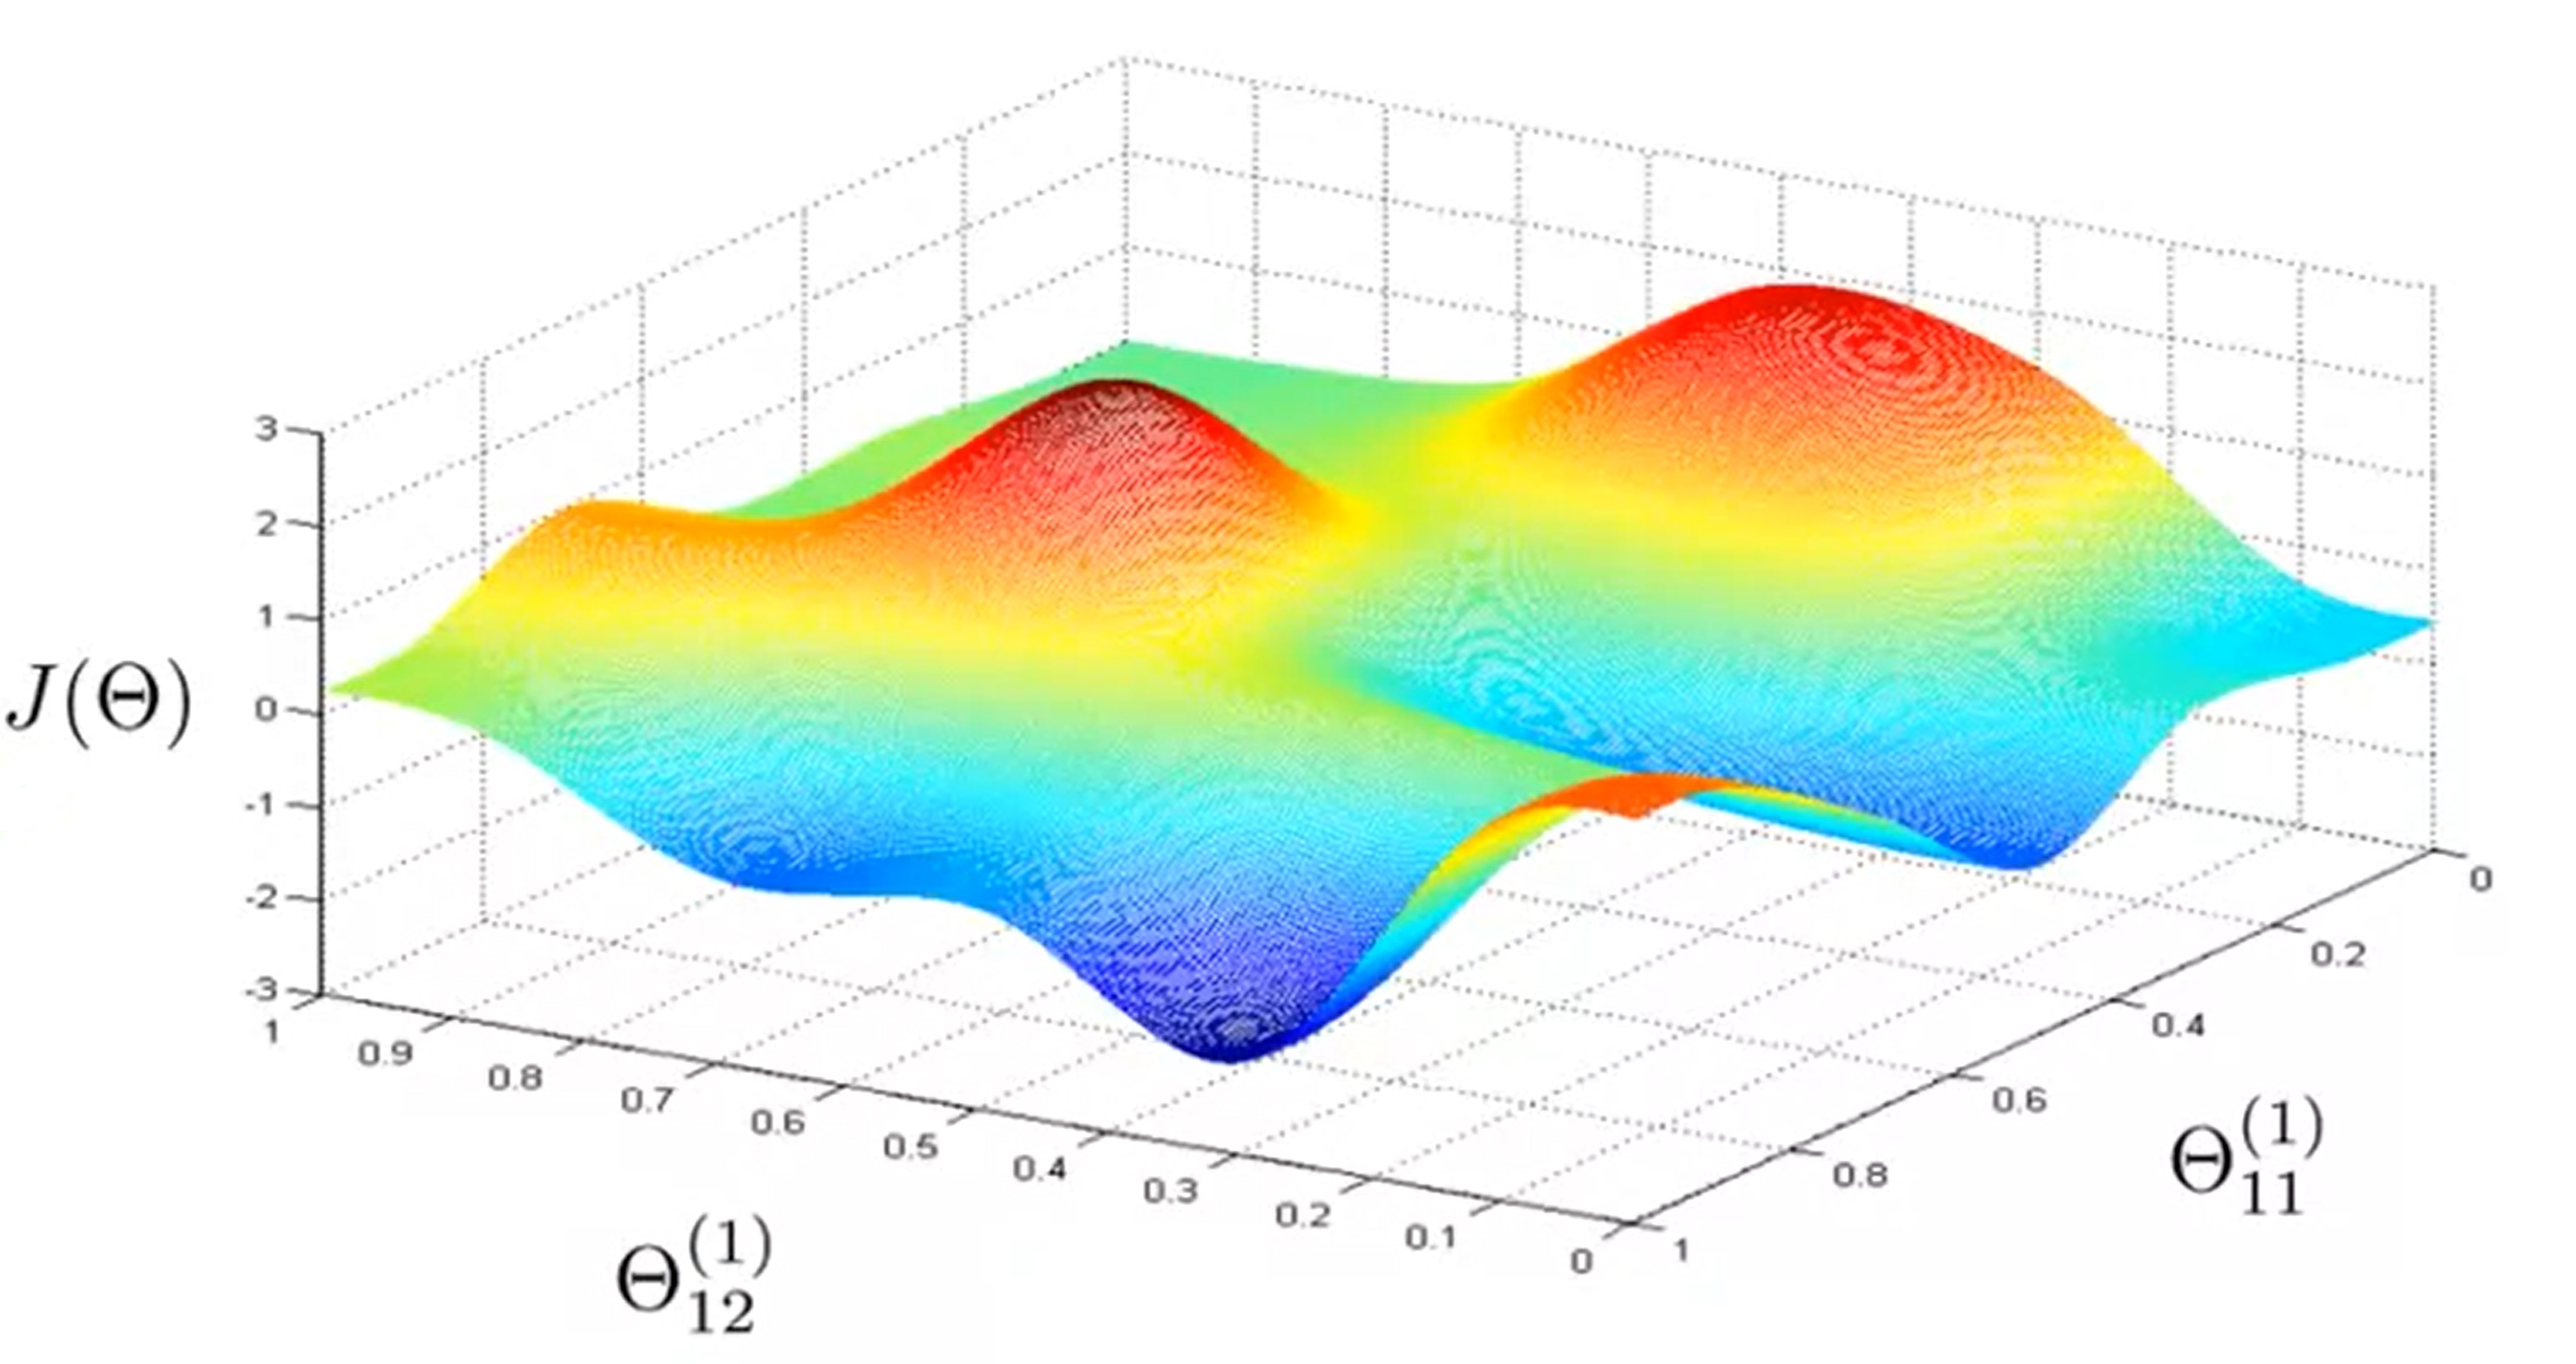

In [10]:
"""Cuando la funcion costo no es convexa, gradient descent no da garantias de
   llegar al minimo global"""
Image(filename='f02.jpg')

In [11]:
"""gradient_descent"""

def gradient_descent(step, iter, lambd):
#    Theta1 = np.zeros((s2, s1+1))
    Theta1 = np.random.normal(0,3, size=(s2,s1+1))   # Theta1: (2,3), esto se puede inicializar en otros valores
#    Theta1 = np.array([[10,-20,-20],[-30,20,20]])
#    Theta2 = np.zeros((s3, s2+1))
    Theta2 = np.random.normal(0,3, size=(s3,s2+1)) # Theta1: (1,3),esto se puede inicializar en otros valores
#    Theta2 = np.array([[-10,20,20]])
    costs = np.zeros(iter + 1)
    A_2, A3 = forward(Theta1, Theta2)
    costs[0] = J(A3)
    for i in range(iter):
        grad1, grad2 = gradient(Theta1, Theta2, A_2, A3, lambd)
#        print("En gradient_descent: grad1.shape = ", grad1.shape)
#        print("En gradient_descent: grad2.shape = ", grad2.shape)
        Theta1 = Theta1 - step * grad1
        Theta2 = Theta2 - step * grad2
        A_2, A3 = forward(Theta1, Theta2)
        costs[i+1] = J(A3)
    return Theta1, Theta2, costs

In [12]:
"""Fijamos tamaño del paso y numero de iteraciones"""

step = 0.1
iter = 50000
lambd = 0.003

"""Corremos el programa"""

Theta1, Theta2, costs = gradient_descent(step, iter, lambd)

In [13]:
print(Theta1)
print(Theta2)

[[-2.15308989 -4.03479314  3.82552325]
 [ 2.05496455 -3.93598914  4.1485458 ]]
[[-2.56519908 -6.27694079  5.82391505]]


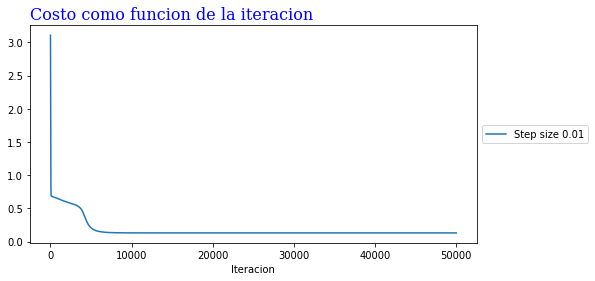

In [14]:
"""Costo como funcion de la iteracion"""

plt.figure(figsize=(8,4))
x_gd = np.linspace(0, iter, iter + 1)

plt.plot(x_gd, costs, label = "Step size 0.01")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Costo como funcion de la iteracion", loc='left', fontsize=16, fontname='serif', color="blue")
plt.show()

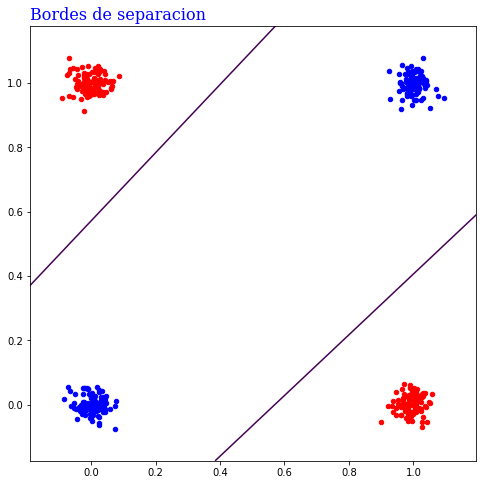

In [15]:
"""Grafico con Bordes de separacion"""

x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])
x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])


fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)



x1 = np.linspace(x1_min-0.1, x1_max+0.1, n)
x2 = np.linspace(x2_min-0.1, x2_max+0.1, n)
X1, X2 = np.meshgrid(x1, x2)

AA10 = 1
AA11 = X1
AA12 = X2

ZZ21 = Theta1[0,0]*AA10 + Theta1[0,1]*AA11 + Theta1[0,2]*AA12 
ZZ22 = Theta1[1,0]*AA10 + Theta1[1,1]*AA11 + Theta1[1,2]*AA12 

AA20 = 1
AA21 = sigmoid(ZZ21)
AA22 = sigmoid(ZZ22)

ZZ3 = Theta2[0,0]*AA20 + Theta2[0,1]*AA21 + Theta2[0,2]*AA22
AA3 = sigmoid(ZZ3)

plt.contour(X1, X2, AA3, [0.5])


ax.scatter(X[:,0], X[:,1], s=1)

for i in range(len(y)):
    if y[i] < 0.1:
        ax.scatter(X[i,0], X[i,1], s=20, c="red")
    else:
        ax.scatter(X[i,0], X[i,1], s=20, c="blue")

ax.set_title("Bordes de separacion", loc='left', fontsize=16, fontname='serif', color="blue")

plt.show()

In [47]:
a = np.ones((2,3))
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [43]:
3 + a

array([[4., 4., 4.],
       [4., 4., 4.]])

In [52]:
b = np.array([[1],[0]])
b

array([[1],
       [0]])

In [53]:
a*b

array([[1., 1., 1.],
       [0., 0., 0.]])